# KNN(k-nearest neighber classifier)

・判別関数(コスト関数)を必要としない  
・学習コストゼロ vs メモリベース  
・次元の呪いによって過学習に陥りやすい → 特徴選択と次元削減で意味ある特徴量のみを使って対応

1. kの値と距離指標を選択 (ユークリッド距離、マンハッタン距離、マハラノビス距離など)
2. 分類したいサンプルからk個の最近傍データ点を見つけ出す
3. k個のデータ点のラベル多数決によりラベリング

ポイント  
・kの値は過学習と学習不足のバランスを見て決める  
・実数値サンプルにはユークリッド距離が頻繁に使われる  
・ユークリッド距離を使用するばあい、各特徴量が距離指標に等しく寄与するように、必ずデータの標準化を行う

<img src="./knn_data/knn_concept/スライド1.png">

領域分割関数

In [13]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))

    # ZはN次元の予測値ベクトル
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    print("xx1.ravel()", len(xx1.ravel()), xx1.ravel())
    print("xx2.ravel()", len(xx2.ravel()), xx2.ravel())

    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # クラス毎にサンプルをプロット
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=cmap(idx), marker=markers[idx], label=cl)

    # テストサンプルを目立たせる（点を○で表示)
    if test_idx:
        X_test, y_test = X[test_idx, :], y[test_idx]
        plt.scatter(X_test[:, 0], X_test[:, 1], c='', edgecolors='black', alpha=1.0, linewidths=1, marker='o', s=55, label='test set')
        

データセット準備

In [14]:
from sklearn import datasets
import numpy as np

iris = datasets.load_iris()
X = iris.data[:,[2,3]]
y = iris.target
print("Class labels:", np.unique(y))

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
X_train_std = ss.fit_transform(X_train)
X_test_std = ss.transform(X_test)

X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

Class labels: [0 1 2]


### Scikit-learn KNN

https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


xx1.ravel() 68370 [-2.55578727 -2.53578727 -2.51578727 ...  2.68421273  2.70421273
  2.72421273]
xx2.ravel() 68370 [-2.43838721 -2.43838721 -2.43838721 ...  2.70161279  2.70161279
  2.70161279]


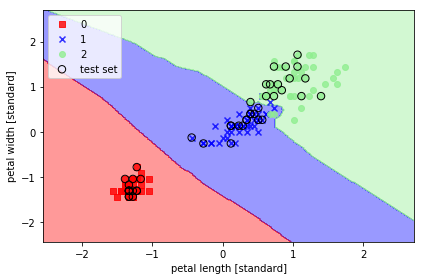

In [18]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

knn = KNeighborsClassifier(n_neighbors=5, p=2, metric='minkowski') # ミンコスキー距離はマンハッタン距離とユークリッド距離を一般化したもの
knn.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std, y_combined, classifier=knn, test_idx=range(105, 150))
plt.xlabel('petal length [standard]')
plt.ylabel('petal width [standard]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()